# Preparação de dados

## Importação de módulos

In [112]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#import seaborn as sns
#sns.set_context("talk")
#sns.set_style("white")

#from IPython.display import HTML
#import urllib
#import bs4 #this is beautiful soup
#import re # regular expressions

## Leitura dos dados

In [2]:
dados = pd.read_csv('dengue_capitais.csv.gz')

In [3]:
dados.head()

,dt_notificacao,co_cid,co_municipio_notificacao,co_municipio_residencia,dt_diagnostico_sintoma,dt_digitacao
0,2012-12-27 00:00:00,A90,110020,110020,2012-12-21 00:00:00,2013-02-22 00:00:00
1,2013-01-14 00:00:00,A90,110020,110020,2013-01-01 00:00:00,2013-02-22 00:00:00
2,2013-02-12 00:00:00,A90,500270,500270,2013-02-09 00:00:00,2013-02-23 00:00:00
3,2013-02-08 00:00:00,A90,520870,520870,2013-02-01 00:00:00,2013-03-01 00:00:00
4,2013-02-27 00:00:00,A90,431490,431490,2013-02-26 00:00:00,2013-02-27 00:00:00


In [4]:
dados.dtypes

dt_notificacao              object
co_cid                      object
co_municipio_notificacao     int64
co_municipio_residencia      int64
dt_diagnostico_sintoma      object
dt_digitacao                object
dtype: object

In [5]:
dados.isnull().sum()

dt_notificacao                 0
co_cid                         0
co_municipio_notificacao       0
co_municipio_residencia        0
dt_diagnostico_sintoma         8
dt_digitacao                8335
dtype: int64

Temos valores omitidos nas colunas dt_diagnostico_sintoma e dt_digitacao. Vamos usar a data da notificação como índice em nossas análises, dado que, de acordo com o especialista consultado, é mais confiável e não tem valores omitidos. 

É necessário transformar as colunas dt_notificacao, dt_diagnostico_sintoma, e dt_digitacao em data (tipo datetime).

In [6]:
dados.dt_notificacao = pd.to_datetime(dados.dt_notificacao, format = '%Y-%m-%d %H:%M:%S')
dados.dt_diagnostico_sintoma = pd.to_datetime(dados.dt_diagnostico_sintoma, format = '%Y-%m-%d %H:%M:%S')
dados.dt_digitacao = pd.to_datetime(dados.dt_digitacao, format = '%Y-%m-%d %H:%M:%S')

In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3684688 entries, 0 to 3684687
Data columns (total 6 columns):
dt_notificacao              datetime64[ns]
co_cid                      object
co_municipio_notificacao    int64
co_municipio_residencia     int64
dt_diagnostico_sintoma      datetime64[ns]
dt_digitacao                datetime64[ns]
dtypes: datetime64[ns](3), int64(2), object(1)
memory usage: 168.7+ MB


In [8]:
dados.isnull().sum()

dt_notificacao                 0
co_cid                         0
co_municipio_notificacao       0
co_municipio_residencia        0
dt_diagnostico_sintoma         8
dt_digitacao                8335
dtype: int64

In [11]:
dados.head()

,dt_notificacao,co_cid,co_municipio_notificacao,co_municipio_residencia,dt_diagnostico_sintoma,dt_digitacao
0,2012-12-27,A90,110020,110020,2012-12-21,2013-02-22
1,2013-01-14,A90,110020,110020,2013-01-01,2013-02-22
2,2013-02-12,A90,500270,500270,2013-02-09,2013-02-23
3,2013-02-08,A90,520870,520870,2013-02-01,2013-03-01
4,2013-02-27,A90,431490,431490,2013-02-26,2013-02-27


Vamos obter o ano, o mês e a semana de cada data de notificação para uso posterior.

In [12]:
ano_notificacao = dados.dt_notificacao.dt.year
mes_notificacao = dados.dt_notificacao.dt.month
semana_notificacao = dados.dt_notificacao.dt.week

Criamos então um novo data_frame apenas com a data da notificacao e o município de residencia.

In [49]:
dengue = {'data': dados.dt_notificacao,
          'residencia': dados.co_municipio_residencia}

In [50]:
dengue = pd.DataFrame(dengue)
dengue.head()

,data,residencia
0,2012-12-27,110020
1,2013-01-14,110020
2,2013-02-12,500270
3,2013-02-08,520870
4,2013-02-27,431490


In [51]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3684688 entries, 0 to 3684687
Data columns (total 2 columns):
data          datetime64[ns]
residencia    int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 56.2 MB


In [85]:
dengue_semana = dengue.groupby(['residencia']).resample('W', on='data').count()

In [86]:
dengue_semana.head()

data  residencia
residencia data                        
110020     2007-01-07     4           4
           2007-01-14     9           9
           2007-01-21    16          16
           2007-01-28     9           9
           2007-02-04    11          11

In [87]:
dengue_semana.drop(columns=['residencia'], inplace=True)
dengue_semana.rename({'data':'ocorrencias'}, axis='columns', inplace=True)

In [88]:
dengue_semana.head()

ocorrencias
residencia data                   
110020     2007-01-07            4
           2007-01-14            9
           2007-01-21           16
           2007-01-28            9
           2007-02-04           11

In [97]:
dengue_semana.index.get_level_values('residencia')

Int64Index([110020, 110020, 110020, 110020, 110020, 110020, 110020, 110020,
            110020, 110020,
            ...
            530010, 530010, 530010, 530010, 530010, 530010, 530010, 530010,
            530010, 530010],
           dtype='int64', name='residencia', length=29403)

In [98]:
dengue_semana.index.get_level_values('data')

DatetimeIndex(['2007-01-07', '2007-01-14', '2007-01-21', '2007-01-28',
               '2007-02-04', '2007-02-11', '2007-02-18', '2007-02-25',
               '2007-03-04', '2007-03-11',
               ...
               '2019-03-10', '2019-03-17', '2019-03-24', '2019-03-31',
               '2019-04-07', '2019-04-14', '2019-04-21', '2019-04-28',
               '2019-05-05', '2019-05-12'],
              dtype='datetime64[ns]', name='data', length=29403, freq=None)

Text(0.5, 0, 'Ano')

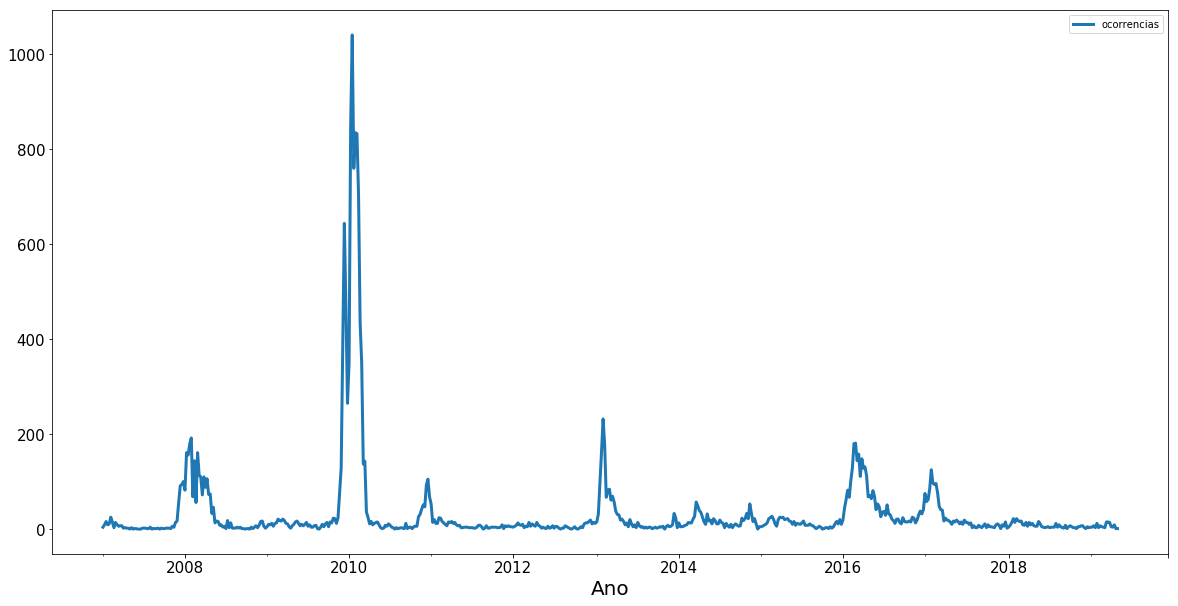

In [113]:
dengue_semana.loc[110020].plot(figsize=(20,10), linewidth=3, fontsize=15)
plt.xlabel('Ano', fontsize=20)

Em seguinda, obtemos a lista de municípios da notificação e de residência da pessoa que contraiu dengue.

In [30]:
municipios = sorted(dados.co_municipio_notificacao.unique().tolist())
residencias = sorted(dados.co_municipio_residencia.unique().tolist())

print(type(municipios), len(municipios), type(residencias), len(residencias))

<class 'list'> 2055 <class 'list'> 28


### Problema: 
Temos 2055 municípios de notificação e apenas 28 de residência